This notebook is the line-by-line pre-processing module for Annie's 2024 BDP DREAM project.

In [7]:
%%bash
# preprocess reference gff and fna
python3 refmerge.py --ref1_gff sample_inputs/GRCh38.gff --ref1_fna sample_inputs/GRCh38.fna --ref2_gff sample_inputs/CHM13.gff --ref2_fna sample_inputs/CHM13.fna --mapfile  sample_inputs/multi_chroms.csv
# main outputs (multiple intermediate ones)
# sample_inputs/final.fna
# sample_inputs/final.gff

Processing with the following reference arguments:
Reference 1: GFF = sample_inputs/GRCh38.gff	FNA = sample_inputs/GRCh38.fna	VDJ = Discard	rDNA = Discard	chrY = Discard
Reference 2: GFF = sample_inputs/CHM13.gff	FNA = sample_inputs/CHM13.fna	VDJ = None	rDNA = None	chrY = Extract
Mapfile: sample_inputs/multi_chroms.csv
[Info]: sample_inputs/GRCh38_canonical.gff exists, moving on...
[Info]: sample_inputs/CHM13_canonical.gff exists, moving on...
[Info]: sample_inputs/GRCh38_canonical.fna exists, moving on...
[Info]: sample_inputs/CHM13_canonical.fna exists, moving on...
[Info]: sample_inputs/GRCh38_canonical_discarded.gff exists, moving on...
[Info]: sample_inputs/GRCh38_canonical_discarded.gff exists, moving on...
Finished processing the reference annotatons.
Output reference annotation 1: sample_inputs/GRCh38_canonical_discarded.gff
Output reference annotation 2: sample_inputs/CHM13_canonical_discarded.gff
Mapfile: sample_inputs/multi_chroms.csv
Processing reference genomes:
Removal co

In [8]:
%%bash
# extract rDNA arrays from chm13
python3 rRNA_extract.py sample_inputs/CHM13_canonical.gff sample_inputs/rRNA_only.with_root.gff

processed gff entries: 100%|██████████| 4734657/4734657 [00:02<00:00, 1617127.10it/s]


753 rDNA entries in total.


Adding fake root: 100%|██████████| 6/6 [00:00<00:00, 9962.72it/s]


Added 206 roots for acrocentric rDNAs.


Write rDNAs to file: 100%|██████████| 753/753 [00:00<00:00, 2332578.22it/s]


In [10]:
%%bash
# canonicalize Ash1 (one time)
python3 tgtalt.py --tgt_fna sample_inputs/Ash1.fna --chroms  sample_inputs/chroms.csv

Processed fna entries: 100%|██████████| 39068079/39068079 [00:16<00:00, 2397142.58it/s]


[Info]: Successfully canonicalized 25 entries.
Canonicalized target file in ['sample_inputs/Ash1_canonical.fna']


In [14]:
%%bash
# masked Ash1 VDJ regions
source /ccb/sw/global.bashrc
bedtools maskfasta -fi sample_inputs/Ash1_canonical.fna -bed sample_inputs/VDJ_coords.bed -fo sample_inputs/Ash1.fna_VDJ_masked.fna

In [ ]:
# extract only chr1, chr13, chr14, chr15, chr21, chr22 from Ash1
%%bash
perl extract_rDNA_fna.pl sample_inputs/Ash1.fna_VDJ_masked.fna > sample_inputs/Ash1.for_pass1.fna

In [7]:
%%bash
# run first pass of liftoff
time liftoff -p 24 \
  -g sample_inputs/rRNA_only.with_root.gff -o /home/rhuang38/Ash1_Refseq/rRNA_only.gff \
  -f sample_inputs/rRNA_types.txt \
  -u /home/rhuang38/Ash1_Refseq/unmapped_rRNAs.txt -chroms sample_inputs/rRNA_chroms.csv -polish -exclude_partial -copies \
  -sc 0.95 sample_inputs/Ash1.for_pass1.fna sample_inputs/CHM13_canonical.fna

extracting features


2024-10-22 20:08:17,910 - INFO - Populating features
2024-10-22 20:08:17,983 - INFO - Populating features table and first-order relations: 1711 features
2024-10-22 20:08:17,983 - INFO - Updating relations
2024-10-22 20:08:17,997 - INFO - Creating relations(parent) index
2024-10-22 20:08:17,998 - INFO - Creating relations(child) index
2024-10-22 20:08:17,998 - INFO - Creating features(featuretype) index
2024-10-22 20:08:17,999 - INFO - Creating features (seqid, start, end) index
2024-10-22 20:08:17,999 - INFO - Creating features (seqid, start, end, strand) index
2024-10-22 20:08:18,000 - INFO - Running ANALYZE features


aligning features


[M::main::0.115*0.89] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.140*0.91] mid_occ = 1506
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_idx_stat::0.156*0.92] distinct minimizers: 1094731 (74.20% are singletons); average occurrences: 2.719; average spacing: 34.019; total length: 101252837
[M::main::0.269*0.95] loaded/built the index for 1 target sequence(s)
[M::main::0.270*0.95] loaded/built the index for 1 target sequence(s)
[M::mm_mapopt_update::0.349*0.96] mid_occ = 433
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::mm_mapopt_update::0.354*0.96] mid_occ = 194
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 1
[M::worker_pipeline::0.384*2.59] mapped 18 sequences
[M::main] Version: 2.28-r1209
[M::main] CMD: minimap2 -o intermediate_files/chr14_to_chr14.sam -a --end-bonus 5 --eqx -N 50 -p 0.5 -t 4 intermediate_files/chr14.fa.mmi intermediate_files/chr14_genes.fa
[M::main] Real time: 0.395 sec; CPU: 1.005 sec;

lifting features
mapping unaligned features to whole genome
aligning features


[M::main::2.065*1.00] loaded/built the index for 6 target sequence(s)
[M::mm_mapopt_update::2.730*1.00] mid_occ = 416
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 6
[M::mm_idx_stat::3.206*1.00] distinct minimizers: 41080836 (61.82% are singletons); average occurrences: 2.636; average spacing: 6.108; total length: 661457016
[M::worker_pipeline::3.707*3.72] mapped 24 sequences
[M::main] Version: 2.28-r1209
[M::main] CMD: minimap2 -o intermediate_files/unmapped_to_expected_chrom_to_target_all.sam -a --end-bonus 5 --eqx -N 50 -p 0.5 -t 24 sample_inputs/Ash1.for_pass1.fna.mmi intermediate_files/unmapped_to_expected_chrom_genes.fa
[M::main] Real time: 3.739 sec; CPU: 13.820 sec; Peak RSS: 2.537 GB


lifting features
mapping gene copies
aligning features


[M::main::2.063*1.00] loaded/built the index for 6 target sequence(s)
[M::mm_mapopt_update::2.728*1.00] mid_occ = 416
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 6
[M::mm_idx_stat::3.201*1.00] distinct minimizers: 41080836 (61.82% are singletons); average occurrences: 2.636; average spacing: 6.108; total length: 661457016
[M::worker_pipeline::7.148*12.89] mapped 341 sequences
[M::main] Version: 2.28-r1209
[M::main] CMD: minimap2 -o intermediate_files/reference_all_to_target_all.sam -a --end-bonus 5 --eqx -N 50 -p 0.5 -t 24 sample_inputs/Ash1.for_pass1.fna.mmi intermediate_files/reference_all_genes.fa
[M::main] Real time: 7.181 sec; CPU: 92.191 sec; Peak RSS: 2.740 GB


lifting features
polishing annotations



real	0m47.863s
user	2m43.100s
sys	0m10.608s


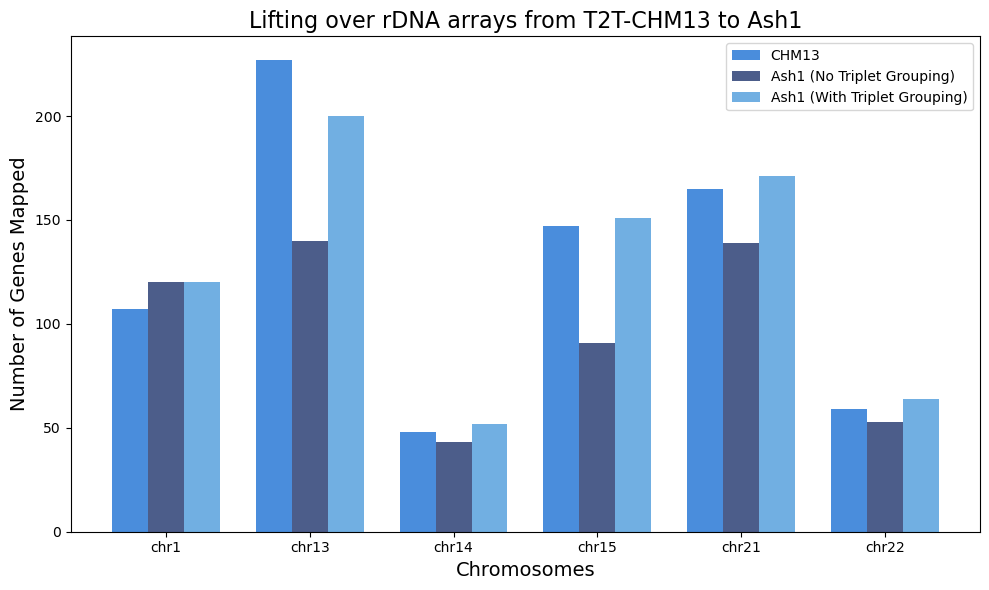

In [9]:
# graph the rRNA liftover result
import matplotlib.pyplot as plt
import numpy as np

# Data
chromosomes = ['chr1', 'chr13', 'chr14', 'chr15', 'chr21', 'chr22']
chm13 = [107, 227, 48, 147, 165, 59]
ash1_no_root = [120, 140, 43, 91, 139, 53]
ash1_with_root = [120, 200, 52, 151, 171, 64]

# Bar width and x-axis positions
bar_width = 0.25
x = np.arange(len(chromosomes))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - bar_width, chm13, width=bar_width, label='CHM13', color='#4A8DDC')
ax.bar(x, ash1_no_root, width=bar_width, label='Ash1 (No Triplet Grouping)', color='#4C5D8A')
ax.bar(x + bar_width, ash1_with_root, width=bar_width, label='Ash1 (With Triplet Grouping)', color='#71AFE2')

# Labels and Title
ax.set_xlabel('Chromosomes', fontsize=14)
ax.set_ylabel('Number of Genes Mapped', fontsize=14)
ax.set_title('Lifting over rDNA arrays from T2T-CHM13 to Ash1', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(chromosomes)
ax.legend()

# Display the graph
# 22 unmapped units
plt.tight_layout()
plt.show()

In [11]:
%%bash
# maskedAsh1 rDNA regions
source /ccb/sw/global.bashrc
bedtools maskfasta -fi sample_inputs/Ash1.fna_VDJ_masked.fna \
  -bed /home/rhuang38/Ash1_Refseq/rRNA_only.gff_polished \
  -fo sample_inputs/Ash1.fna_VDJ_rDNA_masked.fna

In [ ]:
%%bash
# run second pass of liftoff
time liftoff -p 40 -db sample_inputs/final.gff_db \
  -o /home/rhuang38/Ash1_Refseq/second_pass.gff -f sample_inputs/types.txt \
  -u /home/rhuang38/Ash1_Refseq/unmapped_features.txt -chroms sample_inputs/canonical_chroms.txt \
  -polish -exclude_partial -copies -sc 0.95 sample_inputs/Ash1.fna_VDJ_rDNA_masked.fna sample_inputs/final.fna

In [ ]:
%%bash
# merge and sort the final files
gffread -F --keep-genes -sort-alpha rRNA_only.gff_polished > rRNA_only.sorted.gff
cat rRNA_only.sorted.gff second_pass.gff_polished > Ash1.gff
gffread -F --keep-genes -sort-alpha Ash1.gff > result/Ash1_refseq.gff

cat unmapped_rRNAs.txt unmapped_features.txt > result/Ash1_unmapped_features.gff